In [3]:
# Import libraries and dataset
library(e1071)
library(ggplot2)
library(caTools)
loans <- read.csv("loan_data.csv")
str(loans)
summary(loans)

'data.frame':	9578 obs. of  14 variables:
 $ credit.policy    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ purpose          : chr  "debt_consolidation" "credit_card" "debt_consolidation" "debt_consolidation" ...
 $ int.rate         : num  0.119 0.107 0.136 0.101 0.143 ...
 $ installment      : num  829 228 367 162 103 ...
 $ log.annual.inc   : num  11.4 11.1 10.4 11.4 11.3 ...
 $ dti              : num  19.5 14.3 11.6 8.1 15 ...
 $ fico             : int  737 707 682 712 667 727 667 722 682 707 ...
 $ days.with.cr.line: num  5640 2760 4710 2700 4066 ...
 $ revol.bal        : int  28854 33623 3511 33667 4740 50807 3839 24220 69909 5630 ...
 $ revol.util       : num  52.1 76.7 25.6 73.2 39.5 51 76.8 68.6 51.1 23 ...
 $ inq.last.6mths   : int  0 0 1 1 0 0 0 0 1 1 ...
 $ delinq.2yrs      : int  0 0 0 0 1 0 0 0 0 0 ...
 $ pub.rec          : int  0 0 0 0 0 0 1 0 0 0 ...
 $ not.fully.paid   : int  0 0 0 0 0 0 1 1 0 0 ...


 credit.policy     purpose             int.rate       installment    
 Min.   :0.000   Length:9578        Min.   :0.0600   Min.   : 15.67  
 1st Qu.:1.000   Class :character   1st Qu.:0.1039   1st Qu.:163.77  
 Median :1.000   Mode  :character   Median :0.1221   Median :268.95  
 Mean   :0.805                      Mean   :0.1226   Mean   :319.09  
 3rd Qu.:1.000                      3rd Qu.:0.1407   3rd Qu.:432.76  
 Max.   :1.000                      Max.   :0.2164   Max.   :940.14  
 log.annual.inc        dti              fico       days.with.cr.line
 Min.   : 7.548   Min.   : 0.000   Min.   :612.0   Min.   :  179    
 1st Qu.:10.558   1st Qu.: 7.213   1st Qu.:682.0   1st Qu.: 2820    
 Median :10.929   Median :12.665   Median :707.0   Median : 4140    
 Mean   :10.932   Mean   :12.607   Mean   :710.8   Mean   : 4561    
 3rd Qu.:11.291   3rd Qu.:17.950   3rd Qu.:737.0   3rd Qu.: 5730    
 Max.   :14.528   Max.   :29.960   Max.   :827.0   Max.   :17640    
   revol.bal         revol.

In [4]:
# Factorize the specific columns
loans$inq.last.6mths <- factor(loans$inq.last.6mths)
loans$delinq.2yrs <- factor(loans$delinq.2yrs)
loans$pub.rec <- factor(loans$pub.rec)
loans$not.fully.paid <- factor(loans$not.fully.paid)
loans$credit.policy <- factor(loans$credit.policy)
str(loans)

'data.frame':	9578 obs. of  14 variables:
 $ credit.policy    : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ purpose          : chr  "debt_consolidation" "credit_card" "debt_consolidation" "debt_consolidation" ...
 $ int.rate         : num  0.119 0.107 0.136 0.101 0.143 ...
 $ installment      : num  829 228 367 162 103 ...
 $ log.annual.inc   : num  11.4 11.1 10.4 11.4 11.3 ...
 $ dti              : num  19.5 14.3 11.6 8.1 15 ...
 $ fico             : int  737 707 682 712 667 727 667 722 682 707 ...
 $ days.with.cr.line: num  5640 2760 4710 2700 4066 ...
 $ revol.bal        : int  28854 33623 3511 33667 4740 50807 3839 24220 69909 5630 ...
 $ revol.util       : num  52.1 76.7 25.6 73.2 39.5 51 76.8 68.6 51.1 23 ...
 $ inq.last.6mths   : Factor w/ 28 levels "0","1","2","3",..: 1 1 2 2 1 1 1 1 2 2 ...
 $ delinq.2yrs      : Factor w/ 11 levels "0","1","2","3",..: 1 1 1 1 2 1 1 1 1 1 ...
 $ pub.rec          : Factor w/ 6 levels "0","1","2","3",..: 1 1 1 1 1 1 2 1 1 1 ...
 $ not.

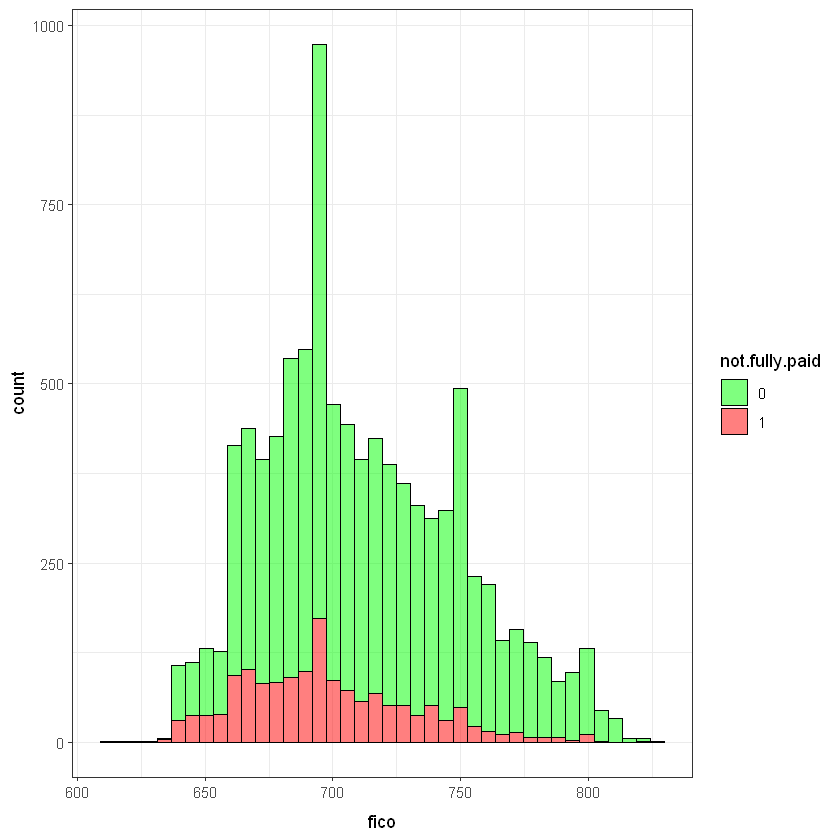

In [11]:
# Plot histogram of fico score
ggplot(loans, aes(fico)) +
    geom_histogram(aes(fill = not.fully.paid), bins = 40, alpha = 0.5, color = "black") +
    scale_fill_manual(values = c("green", "red")) +
    theme_bw()

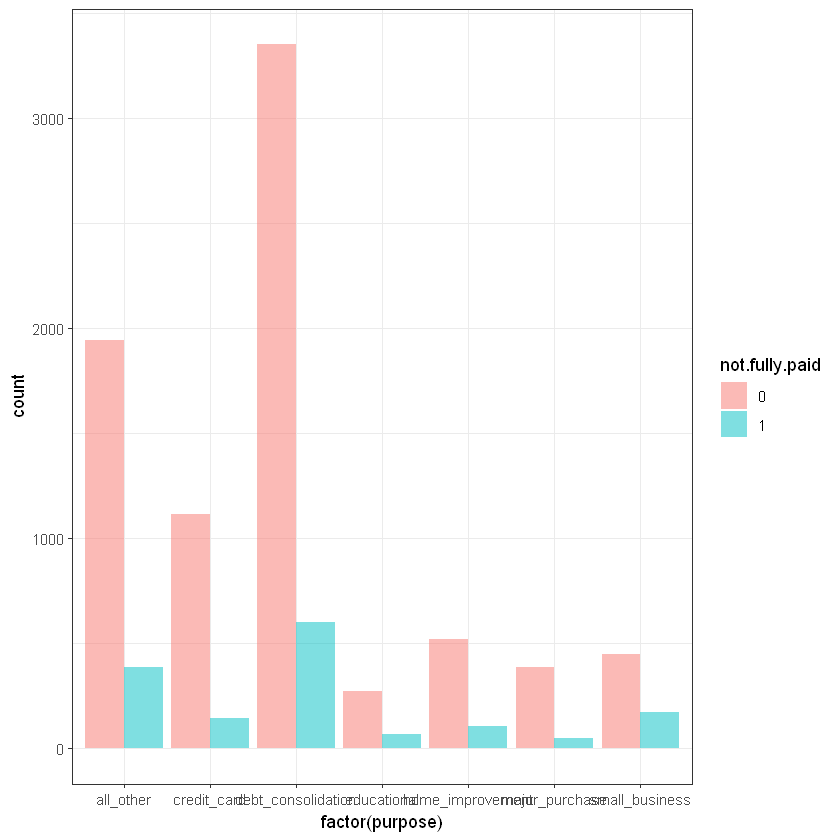

In [15]:
# Plot bar chart of purpose
ggplot(loans, aes(x = factor(purpose))) +
    geom_bar(aes(fill = not.fully.paid), alpha = 0.5, position = "dodge") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    theme_bw()

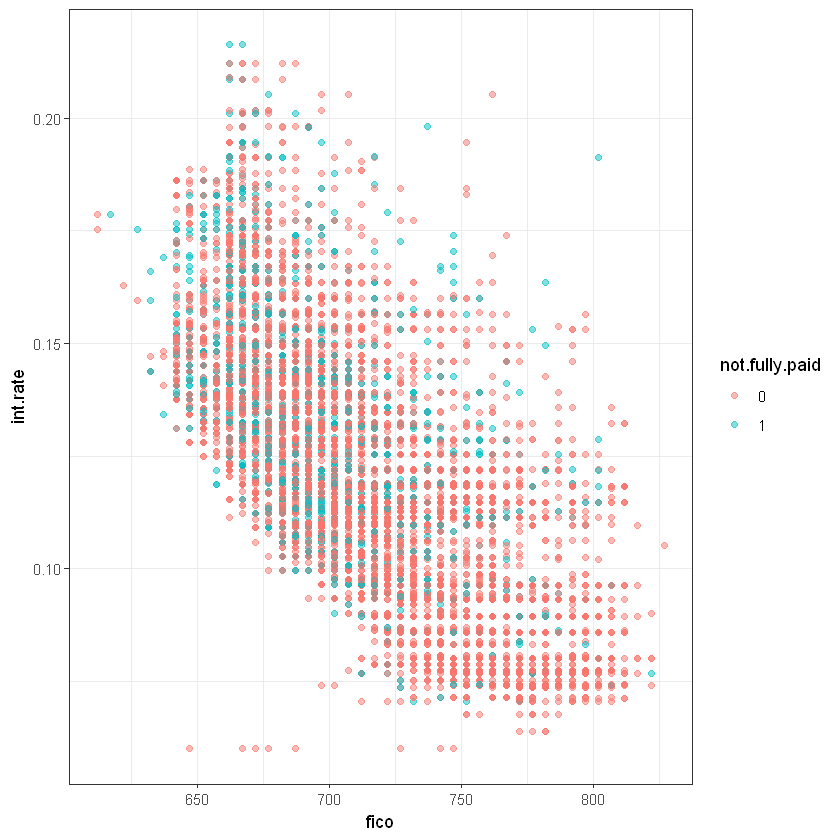

In [16]:
# Plot scatter plot of fico score and interest rate
ggplot(loans, aes(fico, int.rate)) +
    geom_point(aes(color = not.fully.paid), alpha = 0.5) +
    theme_bw()

In [19]:
# Build model and pull summary
set.seed(101)

split <- sample.split(loans$not.fully.paid, SplitRatio = 0.7)
train <- subset(loans, split == TRUE)
test <- subset(loans, split == FALSE)

model <- svm(not.fully.paid ~ ., data = train)
summary(model)


Call:
svm(formula = not.fully.paid ~ ., data = train, kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  2849

 ( 1776 1073 )


Number of Classes:  2 

Levels: 
 0 1




In [20]:
# Use the predict function to predict new values from the test set using the model
predictions <- predict(model, test[1:13])
table(predictions, test$not.fully.paid)

           
predictions    0    1
          0 2413  460
          1    0    0

In [21]:
# Tune the model for best cost and gamma, and print summary
tune.results <- tune(svm, train.x = not.fully.paid ~ ., data = train, kernel = "radial", ranges = list(cost = c(1, 10), gamma = c(0.1, 1)))
summary(tune.results)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1   0.1

- best performance: 0.1600305 

- Detailed performance results:
  cost gamma     error dispersion
1    1   0.1 0.1600305 0.01381824
2   10   0.1 0.1709175 0.01488162
3    1   1.0 0.1607759 0.01421531
4   10   1.0 0.1785250 0.01462696


In [22]:
# Use SVM with best cost and gamma, then use predict function to predict new values from the test set using the model
model <- svm(not.fully.paid ~ ., data = train, cost = 1, gamma = 0.1)
predictions <- predict(model, test[1:13])
table(predictions, test$not.fully.paid)


           
predictions    0    1
          0 2413  459
          1    0    1